In the name of Allah

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv("./../data/divar_posts_dataset.csv")
df

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947630,947630,True,NaN,for-the-home,building-and-garden,stove-and-heating,Shiraz,Friday 07AM,دوعدد یکی یک متری و دیگری 1.4 متری موجود است\n...,16127180351093,1,NaN,web,180000,رادیاتور پنلی نو ترک,NaN,NaN
947631,947631,True,NaN,electronic-devices,audio-video,camera-camcoders,Tehran,Friday 02PM,دوربین هندی کم کنون مدل لگریا fs36\n\nعکاسی و ...,29805298491725,1,NaN,mobile,350000,دوربین هندی کم کنون,NaN,NaN
947632,947632,True,پراید صندوق‌دار::Pride,vehicles,cars,light,Shiraz,Friday 04PM,پراید دوگانه کارخانه میباشد و کم کارکرد.روکش ....,55514317985619,3,43000.0,mobile,17400000,پراید دوگانه کارخانه مدل93,NaN,1393
947633,947633,True,NaN,electronic-devices,mobile-tablet,mobile-tablet-accessories,Mashhad,Friday 05PM,مونو پد یانگ تد همراه با پایه و اینه عقبش\nواس...,65938921533442,1,NaN,mobile,40000,مونوپد یانگ تد خیلی تمیز و نو,NaN,NaN


In [47]:
cat = {1:{}, 2:{}, 3:{}}
cat[1] = {f"{c}":0 for c in np.unique(list(df["cat1"]))}
cat[2] = {f"{c}":0 for c in np.unique(list(df["cat2"]))}
cat[3] = {f"{c}":0 for c in np.unique(list(df["cat3"]))}
cat[1]['nan'] = 0
cat[2]['nan'] = 0
cat[3]['nan'] = 0
cat_label = ["cat1", "cat2", "cat3"]

In [48]:
for i in tqdm(range(len(df["cat1"]))):
    for idx, l in enumerate(cat_label):
        if not pd.isna(df.iloc[i][l]):
            cat[idx+1][df.iloc[i][l]] += 1
        else:
            cat[idx+1]['nan'] += 1

100%|█████████████████████████████████████████████████████████████████████████| 947635/947635 [02:33<00:00, 6170.36it/s]


In [49]:
def plot_bar(size, cat, title):
    plt.figure(figsize=size)
    plt.title(title)
    plt.bar(range(len(cat)), list(cat.values()), align='center')
    plt.xticks(range(len(cat)), list(cat.keys()), rotation='vertical')
    plt.show()

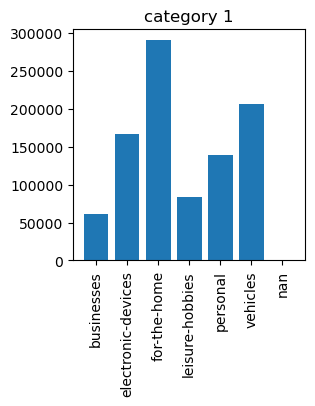

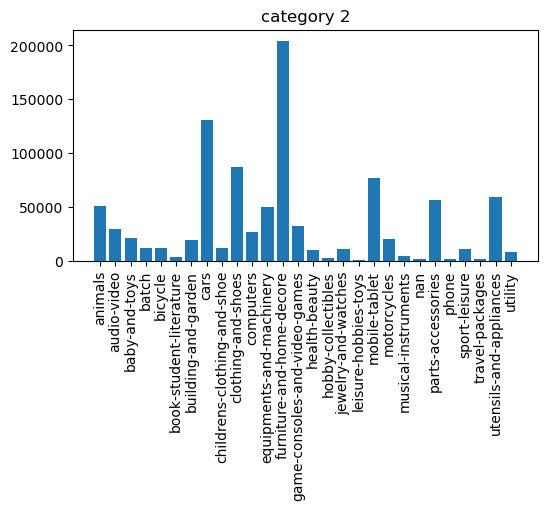

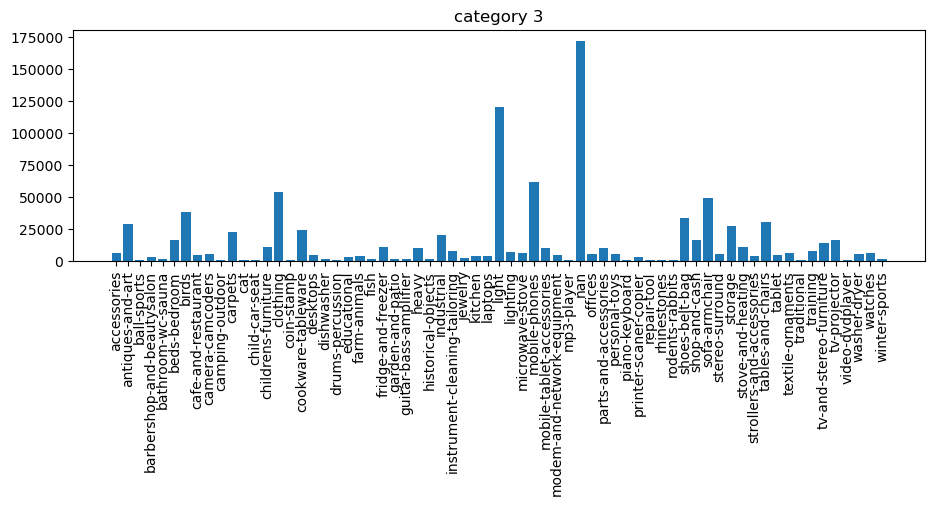

In [50]:
plot_bar((3,3), cat[1], "category 1")
plot_bar((6,3), cat[2], "category 2")
plot_bar((11,3), cat[3], "category 3")

In [69]:
city = {f"{c}":0 for c in list(np.unique(df['city']))}
city['nan'] = 0
for c in df["city"]:
    city[c] += 1

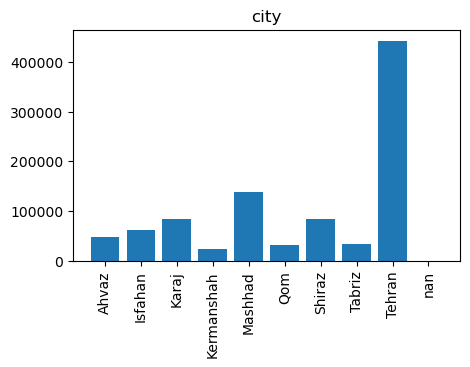

In [70]:
plot_bar((5,3), city, "city")

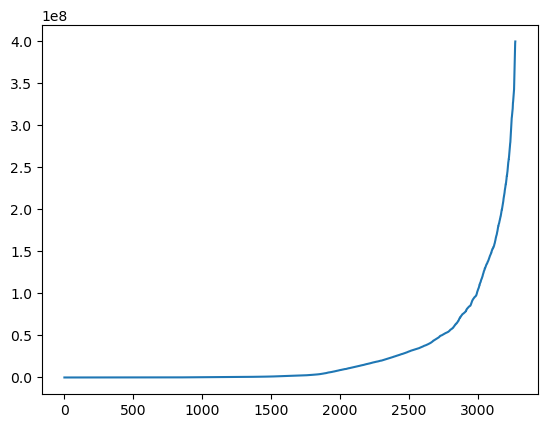

In [66]:
plt.plot(np.unique(df["price"]))
plt.show()

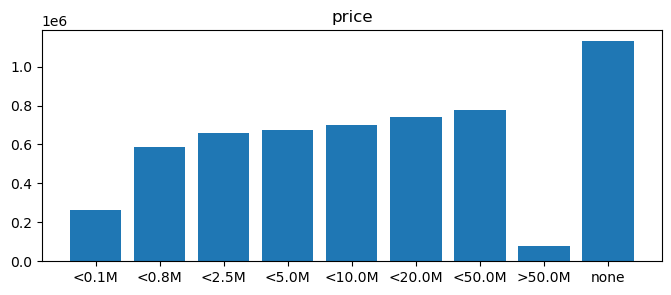

[('<0.1M', 264069),
 ('<0.8M', 584888),
 ('<2.5M', 658419),
 ('<5.0M', 674766),
 ('<10.0M', 698434),
 ('<20.0M', 741003),
 ('<50.0M', 775110),
 ('>50.0M', 77651),
 ('none', 1130024)]

In [114]:
price = [0,0,0,0,0,0,0,0,0]
price_interval = [100_000, 800_000, 2_500_000, 5_000_000, 10_000_000, 20_000_000, 50_000_000]
for p in df["price"]:
    for i, interval in enumerate(price_interval):
        if p <= interval:
            if p == -1:
                price[-1] += 1
            else:
                price[i] += 1
        if p > price_interval[-1]:
            price[-2] += 1

plt.figure(figsize=(8,3))
p_price_interval = [f"<{c/1_000_000}M" for c in price_interval]
p_price_interval.append(f'>{price_interval[-1]/1_000_000}M')
p_price_interval.append('none')
plt.title("price")
plt.bar(range(len(p_price_interval)), price, align='center')
plt.xticks(range(len(p_price_interval)), p_price_interval)
plt.show()

list(zip(p_price_interval, price))

In [128]:
million = 1_000_000
price_list = df[df["price"] != -1]["price"]
print(f"MAX:\t {np.max(price_list)/million:.4f} M")
print(f"MIN:\t {np.min(price_list)/million:.6f} M")
print(f"MEAN:\t {np.mean(price_list)/million:.6f} M")
print(f"MEDIAN:\t {np.median(price_list)/million:.6f} M")
print(f"STD:\t {np.std(price_list)/million:.5f} M")

MAX:	 400.0000 M
MIN:	 0.000001 M
MEAN:	 4.096272 M
MEDIAN:	 0.220000 M
STD:	 14.96480 M


In [129]:
desc = df['desc']
desc_stat = {"len":[], "words":[]}
for d in desc:
    desc_stat["len"].append(len(d))
    desc_stat["words"].append(len(d.split()))

In [186]:
def print_stat(title, stat):
    print(f"{title}:")
    print(f"Num:\t {len(stat)}")
    print(f"MAX:\t {np.max(stat)}")
    print(f"MIN:\t {np.min(stat)}")
    print(f"MEAN:\t {np.mean(stat):.2f}")
    print(f"MEDIAN:\t {np.median(stat):.2f}")
    print(f"STD:\t {np.std(stat):.2f}")

In [187]:
print_stat("Length of description", desc_stat['len'])
print("="*10)
print_stat("Words of description", desc_stat['words'])

Length of description:
Num:	 947635
MAX:	 995
MIN:	 4
MEAN:	 76.46
MEDIAN:	 59.00
STD:	 62.62
Words of description:
Num:	 947635
MAX:	 227
MIN:	 1
MEAN:	 14.93
MEDIAN:	 12.00
STD:	 12.19


In [175]:
def plot_hist_desc(size, stat, title, labels, thr=110_000):
    plt.figure(figsize=size)
    plt.title(title)
    plt.hist(stat, bins=100, label=labels[0])
    plt.plot([np.mean(stat)]*thr, range(0,thr), label=labels[1])
    plt.plot([np.median(stat)]*thr, range(0,thr), label=labels[2])
    plt.legend()
    plt.show()

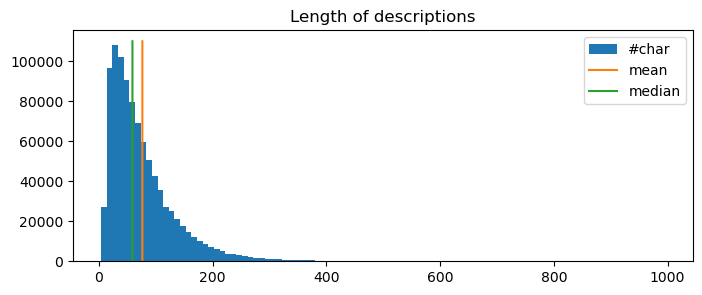

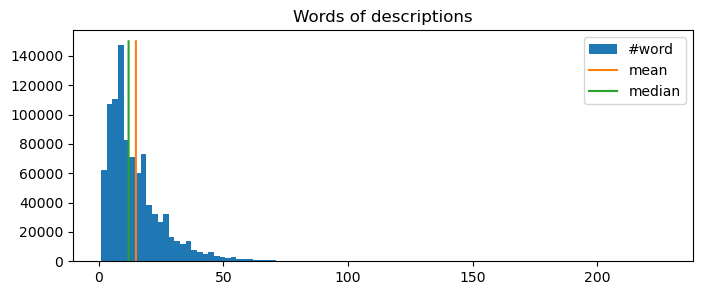

In [176]:
plot_hist_desc((8,3), desc_stat["len"], "Length of descriptions", ["#char", "mean", "median"], thr=110_000)
plot_hist_desc((8,3), desc_stat["words"], "Words of descriptions", ["#word", "mean", "median"], thr=150_000)

In [189]:
print_stat("Length of description", [c for c in desc_stat["len"] if c > 20])
print("="*10)
print_stat("Words of description", [c for c in desc_stat["words"] if c > 10])

Length of description:
Num:	 855446
MAX:	 995
MIN:	 21
MEAN:	 83.03
MEDIAN:	 66.00
STD:	 62.43
Words of description:
Num:	 521091
MAX:	 227
MIN:	 11
MEAN:	 22.01
MEDIAN:	 18.00
STD:	 12.41


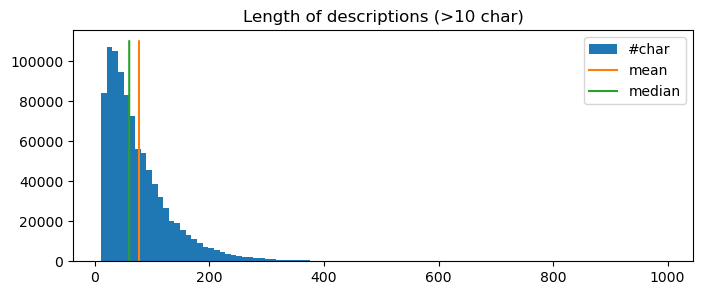

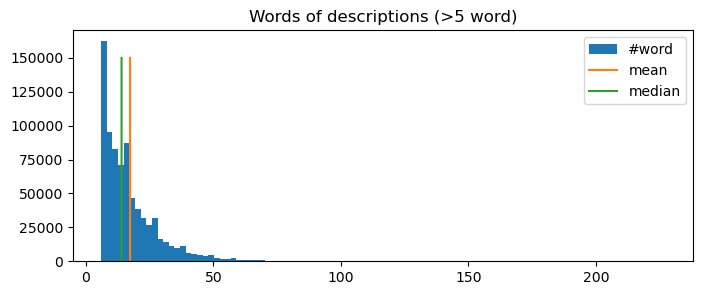

In [177]:
plot_hist_desc((8,3), 
               [c for c in desc_stat["len"] if c > 10], 
               "Length of descriptions (>10 char)", ["#char", "mean", "median"], 
               thr=110_000)
plot_hist_desc((8,3), 
               [c for c in desc_stat["words"] if c > 5], 
               "Words of descriptions (>5 word)", ["#word", "mean", "median"], 
               thr=150_000)